<a href="https://colab.research.google.com/github/Ayman-Abdeen/data_analysis_NumPy/blob/main/titanic_Project_by_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
! pip install kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 26.9MB/s]


In [9]:
! unzip -o titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
df = pd.read_csv('train.csv')

In [11]:
df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df.shape

(891, 12)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Cleaning**

In [18]:
df.drop(['Fare', 'Cabin', 'Name'], axis=1, inplace=True)

In [21]:
df['Age'].mean()

29.69911764705882

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

**Histogram**

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

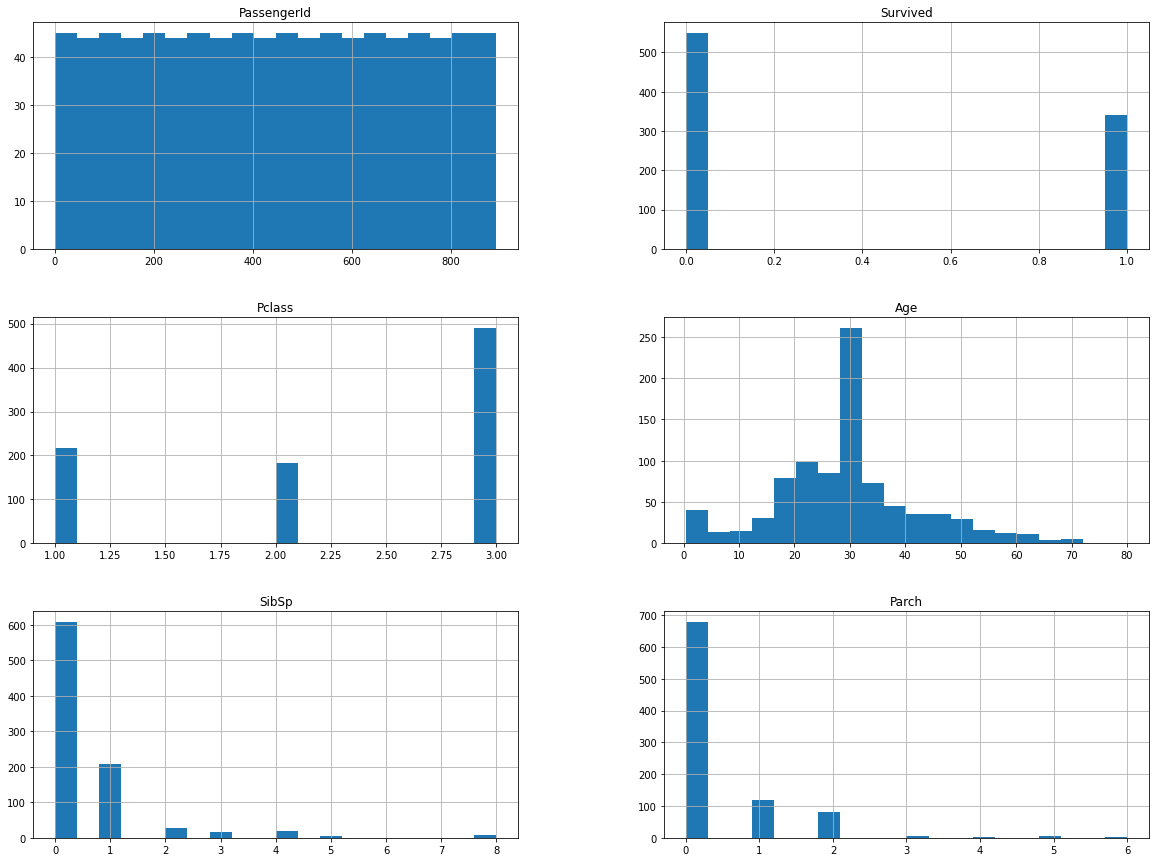

In [25]:
df.hist(bins=20, figsize=(20,15))
plt.show()

Outliers

In [26]:
df_copy = df.copy()

In [28]:
df_copy['Age'].iloc[0:10] = 500

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
df_copy.head(n=15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,male,500.0,1,0,A/5 21171,S
1,2,1,1,female,500.0,1,0,PC 17599,C
2,3,1,3,female,500.0,0,0,STON/O2. 3101282,S
3,4,1,1,female,500.0,1,0,113803,S
4,5,0,3,male,500.0,0,0,373450,S
5,6,0,3,male,500.0,0,0,330877,Q
6,7,0,1,male,500.0,0,0,17463,S
7,8,0,3,male,500.0,3,1,349909,S
8,9,1,3,female,500.0,0,2,347742,S
9,10,1,2,female,500.0,1,0,237736,C


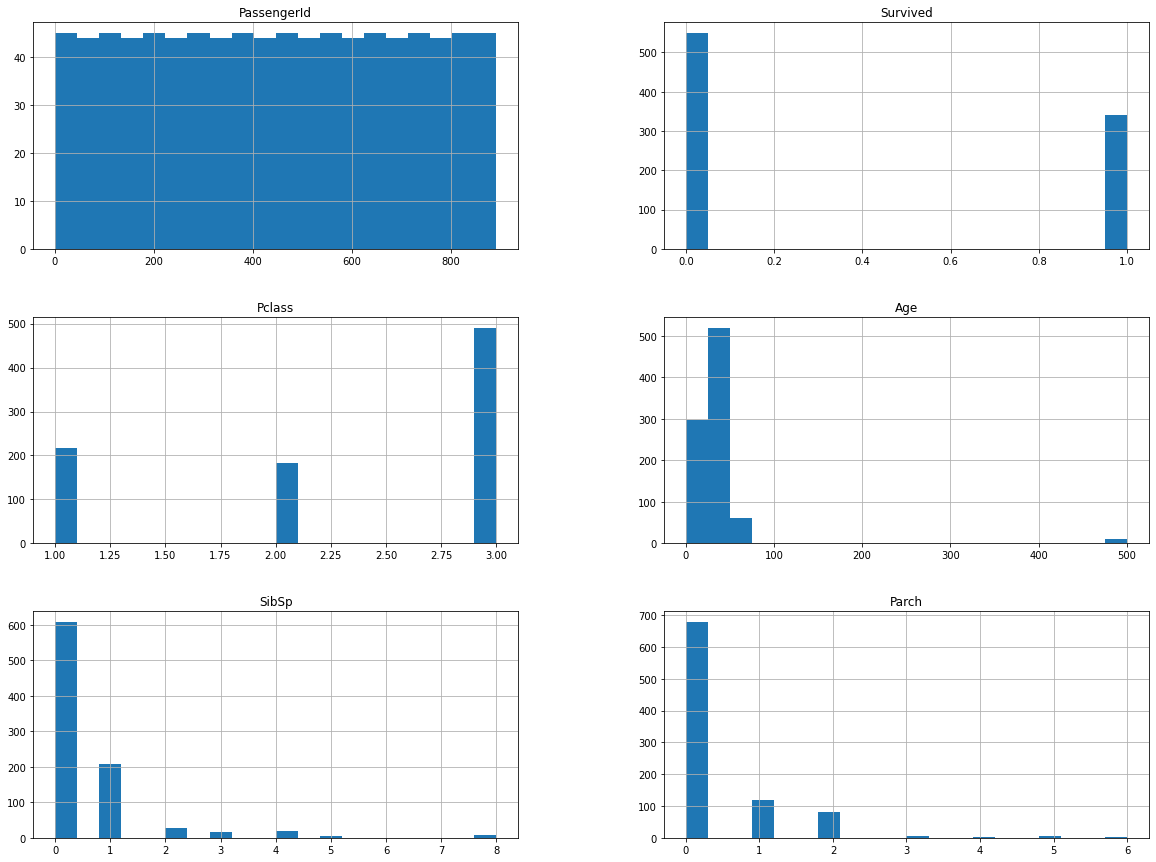

In [31]:
df_copy.hist(bins=20, figsize=(20,15))
plt.show()

In [33]:
df_copy[ df_copy['Age'] > 100 ]['Age'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [35]:
df_copy.drop( df_copy[ df_copy['Age'] > 100 ]['Age'].index, inplace=True )

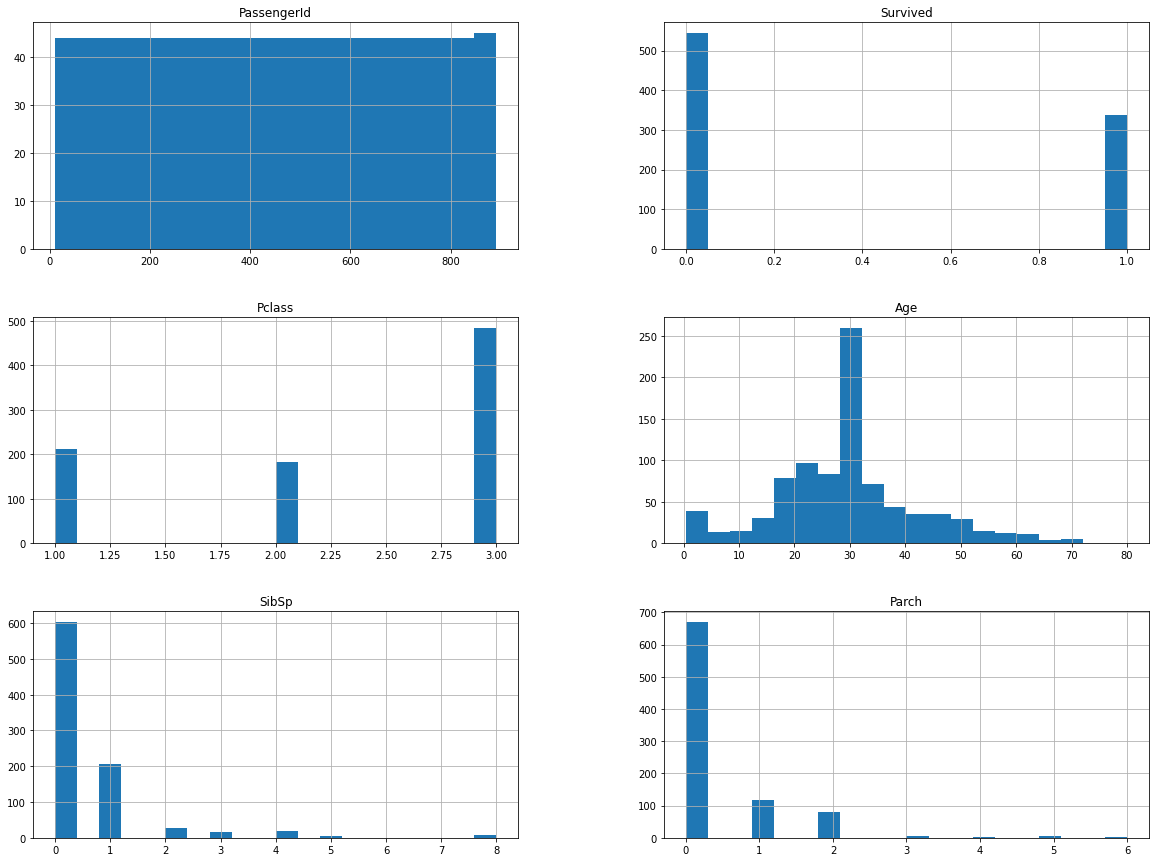

In [36]:
df_copy.hist(bins=20, figsize=(20,15))
plt.show()

In [37]:
df_copy.shape

(881, 9)

**Alive**

In [39]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [41]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
# survived males
gender_df = df[ df['Sex']=='male' ]
survived = gender_df[ gender_df['Survived']==1 ]
survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
survived_percentage

18.890814558058924

In [44]:
for gen in df['Sex'].unique():
    print(gen)
    gender_df = df[ df['Sex']==gen ]
    survived = gender_df[ gender_df['Survived']==1 ]
    survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
    print("Count: ", gender_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n=====\n")
    

male
Count:  577
Servived  :  18.89 %

=====

female
Count:  314
Servived  :  74.20 %

=====



In [46]:
for x_class in df['Pclass'].unique():
    print(x_class)
    
    x_df = df[ df['Pclass']==x_class ]
    survived = x_df[ x_df['Survived']==1 ]
    
    survived_percentage = ( survived.shape[0] / x_df.shape[0] ) * 100
    
    print("Count: ", x_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n====\n")
    

3
Count:  491
Servived  :  24.24 %

====

1
Count:  216
Servived  :  62.96 %

====

2
Count:  184
Servived  :  47.28 %

====



In [47]:
def age_to_category( age ):
    if age < 4:
        return 0 #"baby"
    elif age < 10:
        return 1 #"child"
    elif age < 21:
        return 2 #"teen"
    elif age < 33:
        return 3 #"young adult"
    elif age < 50:
        return 4 #"adult"
    return 5 #"elder"

age_cats = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "young adult",
    4: "adult",
    5: "elder"
}

In [53]:
df['Age_phase'] = df['Age']

In [52]:
## 1st way
for i in range( df.shape[0] ):
    df['Age_phase'].iloc[i] = age_to_category( df['Age'].iloc[i] )

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
## 2nd way
df['Age_phase'] = df['Age'].apply( age_to_category )

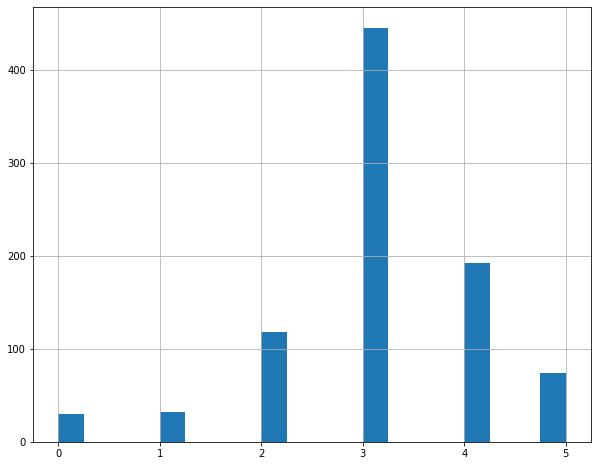

In [57]:
df['Age_phase'].hist(bins=20, figsize=(10,8))

In [58]:
for phase in df['Age_phase'].unique():
    print( age_cats[phase] )
    
    phase_df = df[ df['Age_phase']==phase ]
    survived = phase_df[ phase_df['Survived'] == 1 ]
    
    survived_percentage = ( survived.shape[0] / phase_df.shape[0] ) * 100
    
    print("Count: ", phase_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("\n=========\n")

young adult
Count:  445
Servived  :  34.61 %


adult
Count:  192
Servived  :  41.15 %


elder
Count:  74
Servived  :  36.49 %


baby
Count:  30
Servived  :  66.67 %


teen
Count:  118
Servived  :  37.29 %


child
Count:  32
Servived  :  56.25 %




In [59]:
df.to_csv('new_set.csv', sep='\t', encoding='utf8' )

In [60]:
new_df = pd.read_csv('new_set.csv', sep='\t' ,encoding='utf8')

In [61]:
new_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Age_phase
0,0,1,0,3,male,22.0,1,0,A/5 21171,S,3
1,1,2,1,1,female,38.0,1,0,PC 17599,C,4
2,2,3,1,3,female,26.0,0,0,STON/O2. 3101282,S,3
3,3,4,1,1,female,35.0,1,0,113803,S,4
4,4,5,0,3,male,35.0,0,0,373450,S,4
